In [1]:
from exps.loaders import Loaders
from exps.mundial_exps import Experimentos
ld=Loaders()
exper=Experimentos()

In [2]:
path = './datain/Proyecto_mundial.xlsx'
df_mundial= ld.cargar_excel(path,'Sheet1')

In [3]:
df_mundial.columns

Index(['KEY', 'MYEAR', 'SIG_SLECCCION', 'PLAYER_NAME', 'COACH.x', 'club_name',
       'player_club_pais', 'Goles Marcados(mundial)', 'Player_Birth',
       'Año de Debut', 'Posicion', 'Partidos Jugados', 'Seleccion',
       'birth_year', 'edad_Player', 'years_expMundial', 'edad_enMundial',
       'tecnico_campeon', 'tecnico_anfitrion', 'Tecnico_outsider',
       'País Anfitrión', 'Campeón', 'Nacionalidad', 'dias_durados', 'COACH.y',
       'equipo_local', 'Era', 'FaseAlcanzada', 'confederacion',
       'etapa_general', 'dummy_goleador', 'dummy_campeon', 'dummy_subcampeon',
       'dummy_semifinalista', 'dummy_eliminados_tempranos', 'dummy_finalistas',
       'player_ones', 'player_anotador', 'categ_posicion', 'edad_categoria',
       'exp_categoria'],
      dtype='object')

# PROBABILIDADES:

## 1. EMPIRICA / FRECUENTISTA

In [4]:
p_campeon= exper.probabilidad_binaria_empirica(df_mundial,'dummy_campeon')
p_finalistas= exper.probabilidad_binaria_empirica(df_mundial,'dummy_finalistas')
p_semi_finalistas= exper.probabilidad_binaria_empirica(df_mundial,'dummy_semifinalista')
p_perder= exper.probabilidad_binaria_empirica(df_mundial,'dummy_eliminados_tempranos')

In [5]:
print(f"P_Campeon: {p_campeon}")
print(f"P_finalista: {p_finalistas}")
print(f"semi_finalistas: {p_semi_finalistas}")
print(f"P_perder: {p_perder}")

P_Campeon: 0.0475473321858864
P_finalista: 0.09487951807228916
semi_finalistas: 0.09369621342512909
P_perder: 0.8114242685025818


## 2. CONJUNTA

### 2.1. SINGLE

#### La probabilidad de que un jugador sea campeon por pais

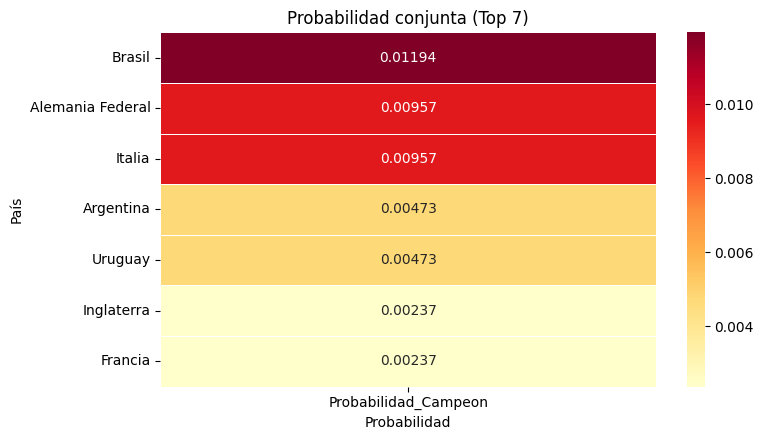

In [7]:
select_champ= exper.tabla_probabilidad_conjunta(df_mundial,'Seleccion','dummy_campeon')
exper.grap_contingencia(select_champ,top=7)


In [15]:
select_champ

dummy_campeon,0,1
Seleccion,,
Alemania Federal,0.033348,0.009574
Alemania Oriental,0.002367,0.000000
Angola,0.002582,0.000000
Arabia Saudita,0.009574,0.000000
Argelia,0.009682,0.000000
...,...,...
Ucrania,0.002474,0.000000
Unión Soviética,0.016566,0.000000
Uruguay,0.023989,0.004733


#### La probabilidad de que un jugador sea perdedor por pais

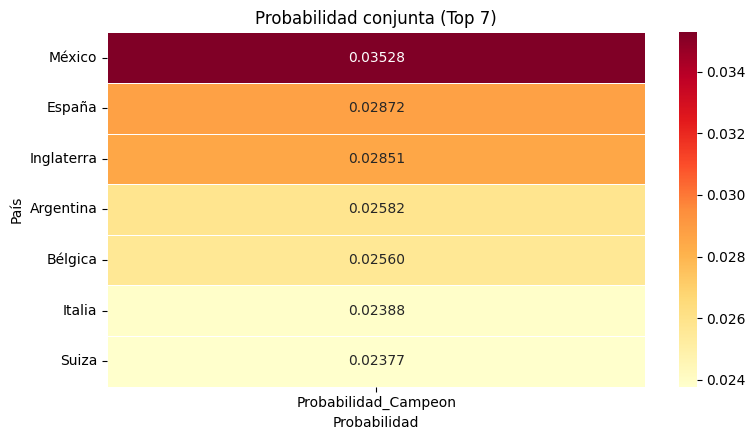

In [8]:
select_losers= exper.tabla_probabilidad_conjunta(df_mundial,'Seleccion','dummy_eliminados_tempranos')
exper.grap_contingencia(select_losers,top=7)


#### La probabilidad de que un jugador sea ganador por edad

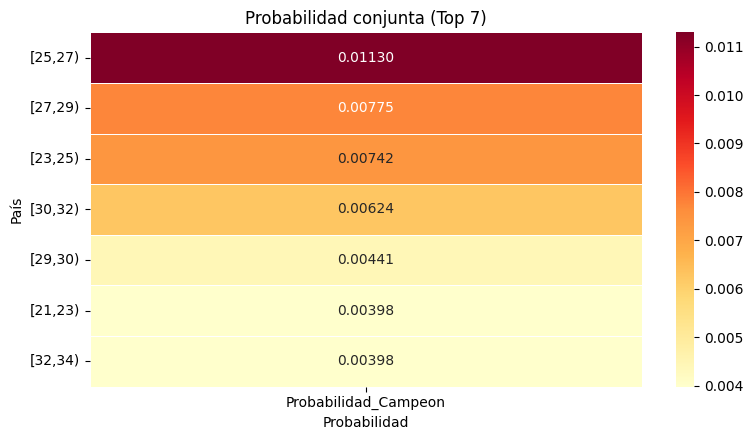

In [9]:
select_age_champs= exper.tabla_probabilidad_conjunta(df_mundial,'edad_categoria','dummy_campeon')
exper.grap_contingencia(select_age_champs,top=7)

#### La probabilidad de que un jugador sea perdedor por edad

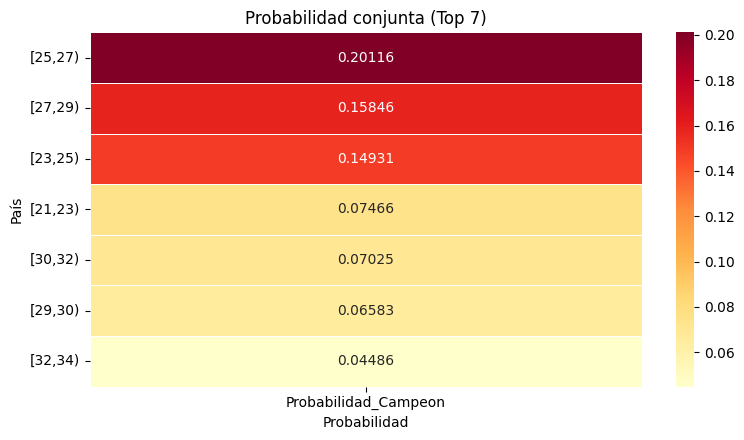

In [10]:
select_age_losers= exper.tabla_probabilidad_conjunta(df_mundial,'edad_categoria','dummy_eliminados_tempranos')
exper.grap_contingencia(select_age_losers,top=7)

#### La probabilidad de que un jugador sea ganador por Confederacion

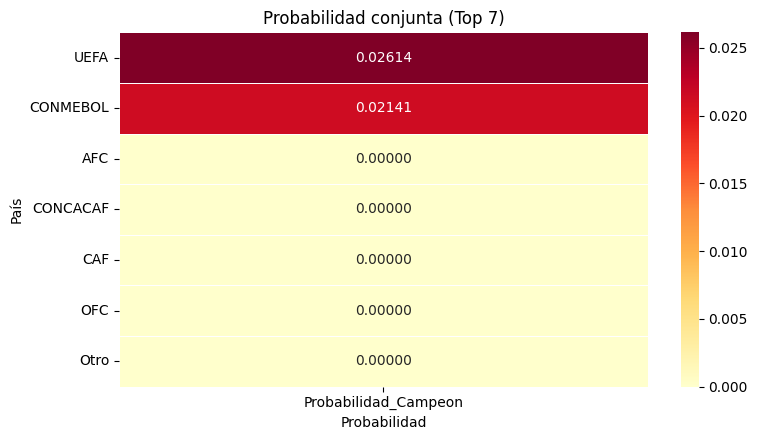

In [11]:
select_conf_champs= exper.tabla_probabilidad_conjunta(df_mundial,'confederacion','dummy_campeon')
exper.grap_contingencia(select_conf_champs,top=7)


#### La probabilidad de que un jugador sea perdedor por Confederacion

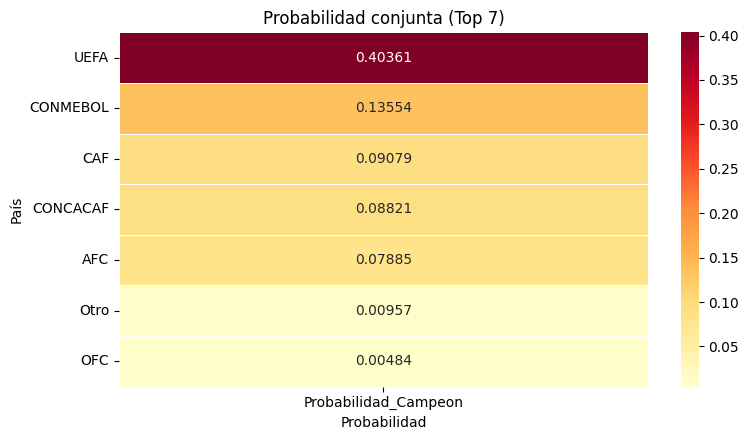

In [12]:
select_conf_losers= exper.tabla_probabilidad_conjunta(df_mundial,'confederacion','dummy_eliminados_tempranos')
exper.grap_contingencia(select_conf_losers,top=7)

### 2.2. MULTIPLE

#### La probabilidad de que un jugador sea ganador por seleccion y edad

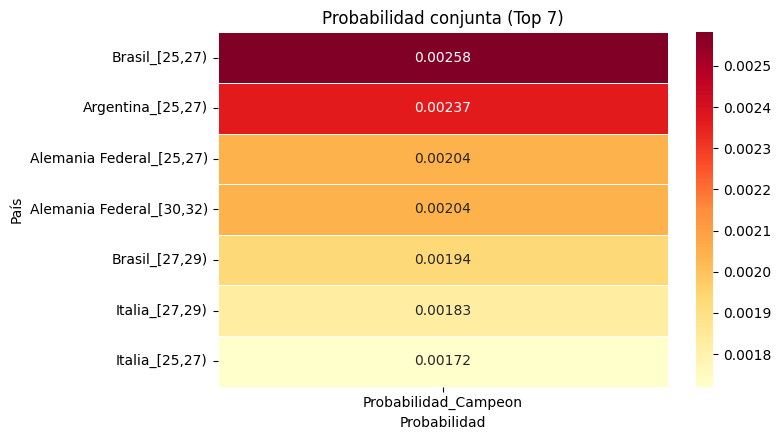

In [13]:
select_SELECCION_EDAD_champs= exper.tabla_probabilidad_conjunta(df_mundial,['Seleccion','edad_categoria'],'dummy_campeon')
exper.grap_contingencia(select_SELECCION_EDAD_champs, top=7)

#### La probabilidad de que un jugador sea perdedor por seleccion y edad

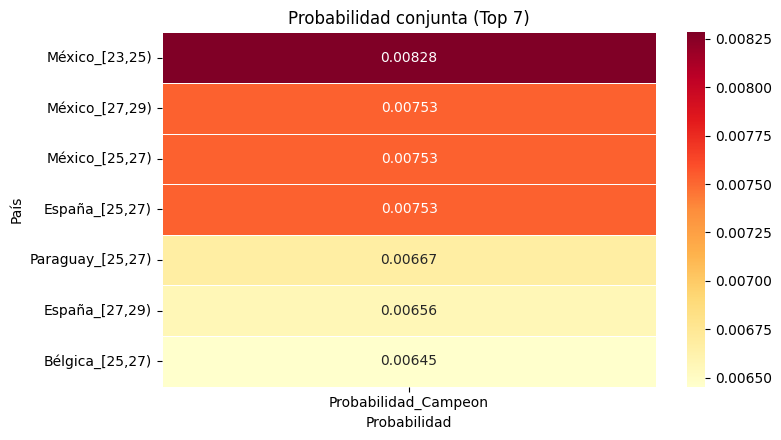

In [14]:
select_SELECCION_EDAD_losers= exper.tabla_probabilidad_conjunta(df_mundial,['Seleccion','edad_categoria'],'dummy_eliminados_tempranos')
exper.grap_contingencia(select_SELECCION_EDAD_losers, top=7)


## 3. MARGINAL

In [16]:
import pandas as pd

def agregar_marginales(tabla_conjunta):
    """
    Recibe una tabla de probabilidad conjunta (normalizada con `normalize='all'`) y 
    le agrega las probabilidades marginales por fila y por columna.

    Args:
        tabla_conjunta (pd.DataFrame): Tabla con columnas binarias (ej. 0, 1)

    Returns:
        pd.DataFrame: Tabla extendida con marginales de fila y columna.
    """
    # Verifica que las columnas sean 0 y 1
    if set(tabla_conjunta.columns) != {0, 1}:
        raise ValueError("La tabla debe tener exactamente las columnas 0 y 1 como variables binarias.")
    
    # Copiar tabla original
    tabla = tabla_conjunta.copy()

    # Marginal por fila (sumar las conjuntas por cada categoría de fila)
    tabla['Marginal_fila'] = tabla.sum(axis=1)

    # Marginal por columna (sumar todos los valores por evento)
    marginal_col = tabla.sum(axis=0)
    marginal_col['Marginal_fila'] = marginal_col.sum()  # Total = 1.0

    # Agregar la fila final
    tabla.loc['Marginal_col'] = marginal_col

    return tabla


In [ ]:
tabla_conjunta = pd.crosstab(df_mundial['Seleccion'], df_mundial['dummy_campeon'], normalize='all')
tabla_completa = agregar_marginales(tabla_conjunta)

print(tabla_completa)
